## APPLIED STATISTICS

### Turma 10DTSR

### Sorteio de amostra probabilística e cálculo do Intervalo de confiança de 95%

In [1]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### Contexto dos dados

A gerente da área de Marketing Relacionamento da empresa XYZ tem observado, nas últimas campanhas, 
um aumento no número de clientes não contatados. Uma das estratégias para melhorar esse quadro é a 
utilização de outros canais de relacionamento. A gerente deseja testar os canais de relacionamento 
em uma amostra de tamanho igual a 40.



#### Dicionário de variáveis:

#### Sexo: 2=Masculino;4=Feminino

#### Idade: Idade 

#### Cor_pele:0=missing; 2=Branca; 4=Preta; 6=Amarela; 8 = Parda

#### Telefone móvel:2=Sim; 4=Não

#### Anos_estudo: Anos de estudo

# Importar o arquivo de dados

In [3]:
# Importar o arquivo Arq_trab3.csv

df = pd.read_csv('Arq_Marketing Relacionamento da empresa XYZ.csv', sep=',')

In [5]:
# visualizando alguns dados
df.head()

,ID,Sexo,idade,Cor_pele,Telefone_movel,Anos_estudo
0,1,2,30,8,4,2
1,2,4,36,8,2,9
2,3,2,19,2,2,12
3,7,2,26,2,2,16
4,8,4,21,2,2,11


In [7]:
# visualizando formatos das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616 entries, 0 to 2615
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              2616 non-null   int64
 1   Sexo            2616 non-null   int64
 2   idade           2616 non-null   int64
 3   Cor_pele        2616 non-null   int64
 4   Telefone_movel  2616 non-null   int64
 5   Anos_estudo     2616 non-null   int64
dtypes: int64(6)
memory usage: 122.8 KB


In [9]:
df.Telefone_movel.value_counts(normalize=True)

Telefone_movel
2    0.792049
4    0.207951
Name: proportion, dtype: float64

In [11]:
# mudar o formato da variável number para string
df['Sexo'] = df['Sexo'].astype(str)
df['Cor_pele'] = df['Cor_pele'].astype(str)
df['Telefone_movel'] = df['Telefone_movel'].astype(str)

In [13]:
# visualizando formatos das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616 entries, 0 to 2615
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              2616 non-null   int64 
 1   Sexo            2616 non-null   object
 2   idade           2616 non-null   int64 
 3   Cor_pele        2616 non-null   object
 4   Telefone_movel  2616 non-null   object
 5   Anos_estudo     2616 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 122.8+ KB


# Tabela de Frequência da População

In [15]:
# table(Sexo)
sexo =pd.pivot_table(df, index='Sexo', values='ID', aggfunc=np.count_nonzero)

In [17]:
sexo['%'] = (pd.pivot_table(df, index='Sexo', values='ID', aggfunc=np.count_nonzero))/df['ID'].count()*100

In [19]:
sexo

,ID,%
Sexo,,
2,1240,47.400612
4,1376,52.599388


In [21]:
# table(Cor_pele)
corpele =pd.pivot_table(df, index='Cor_pele', values='ID', aggfunc=np.count_nonzero)


In [23]:
corpele ['%'] = (pd.pivot_table(df, index='Cor_pele', values='ID', aggfunc=np.count_nonzero))/df['ID'].count()*100

In [25]:
corpele

,ID,%
Cor_pele,,
0,11,0.420489
2,1244,47.553517
4,202,7.721713
6,17,0.649847
8,1142,43.654434


#### Medidas resumo da Idade e Anos de estudo da População

In [27]:
df.describe()

,ID,idade,Anos_estudo
count,2616.000000,2616.000000,2616.000000
mean,1966.632263,41.511468,8.504969
std,1081.896479,16.657495,4.550038
min,1.000000,18.000000,1.000000
25%,1044.750000,28.000000,5.000000
50%,2018.500000,39.000000,9.000000
75%,2902.250000,52.000000,12.000000
max,3805.000000,97.000000,17.000000


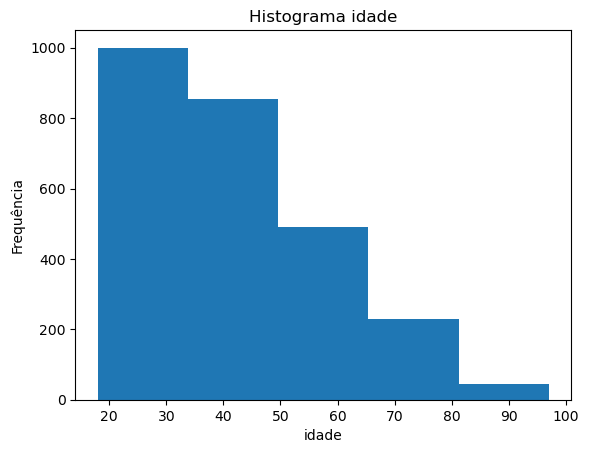

In [29]:
# Histograma da variável idade
plt.hist(df['idade'], bins=5)
plt.ylabel('Frequência')
plt.xlabel('idade')
plt.title('Histograma idade');

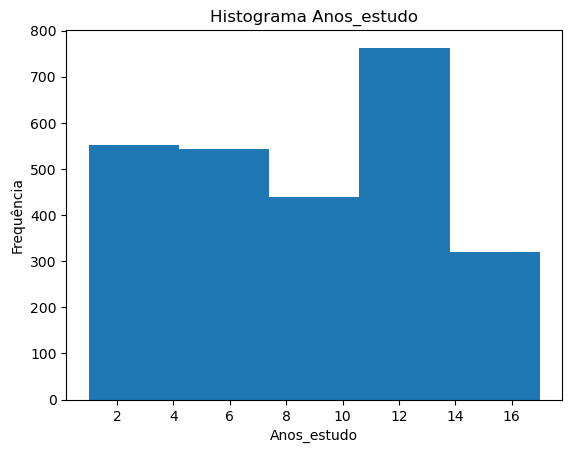

In [31]:
# Histograma da variável Anos_estudo
plt.hist(df['Anos_estudo'], bins=5)
plt.ylabel('Frequência')
plt.xlabel('Anos_estudo')
plt.title('Histograma Anos_estudo');

# Sorteio da amostra probabilística

In [33]:
#amostra probabilística simples sem repetição com 40 unidades

# amostra_aleat = Dados.sample(40)
# df_sample = df.sample(40, random_state = 123)

df_sample = df.sample(40)



In [35]:
# visualizando formatos das variáveis da amostra
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 1495 to 214
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              40 non-null     int64 
 1   Sexo            40 non-null     object
 2   idade           40 non-null     int64 
 3   Cor_pele        40 non-null     object
 4   Telefone_movel  40 non-null     object
 5   Anos_estudo     40 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.2+ KB


In [37]:
df_sample

,ID,Sexo,idade,Cor_pele,Telefone_movel,Anos_estudo
1495,2272,2,28,2,2,12
1337,2057,4,41,8,2,16
1098,1709,2,63,8,2,4
2234,3271,2,53,2,2,9
487,788,2,26,2,2,1
682,1084,4,39,8,4,9
278,471,4,44,2,4,11
2026,2992,4,50,2,2,4
79,133,2,28,8,2,12
1074,1667,2,43,4,2,12


# Tabela de Frequência da Amostra

In [39]:
# table(tem telefone celular)

frequencia = amostra_aleat['Telefone_movel'].value_counts()
percentual = amostra_aleat['Telefone_movel'].value_counts(normalize = True)*100
dist_freq_amostra = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual})
dist_freq_amostra

NameError: name 'amostra_aleat' is not defined

# Medidas resumo da Idade e Anos de estudo da Amostra

In [41]:
df_sample.describe().round(2) 

,ID,idade,Anos_estudo
count,40.00,40.00,40.0
mean,1722.82,39.55,8.8
std,1011.06,13.65,4.8
min,32.00,18.00,1.0
25%,958.75,28.00,4.0
50%,1688.00,39.00,10.0
75%,2508.00,47.00,12.0
max,3644.00,78.00,16.0


In [ ]:
#amostra probabilística simples sem repetição com 40 unidades
# amostra_aleat = Dados.sample(40)

In [43]:
# table(sexo)
sexo_ams =pd.pivot_table(df_sample, index='Sexo', values='ID', aggfunc=np.count_nonzero)

In [45]:
sexo_ams['%'] = (pd.pivot_table(df_sample, index='Sexo', values='ID', aggfunc=np.count_nonzero))/df_sample['ID'].count()*100

In [47]:
sexo_ams

,ID,%
Sexo,,
2,21,52.5
4,19,47.5



#### Medidas resumo da Idade e Anos de estudo da Amostra

In [49]:
df_sample.describe()

,ID,idade,Anos_estudo
count,40.000000,40.000000,40.000000
mean,1722.825000,39.550000,8.800000
std,1011.062449,13.654998,4.799573
min,32.000000,18.000000,1.000000
25%,958.750000,28.000000,4.000000
50%,1688.000000,39.000000,10.000000
75%,2508.000000,47.000000,12.000000
max,3644.000000,78.000000,16.000000


#### Esses resultados foram obtidos através de uma amostra aleatória selecionada
#### Mas................... Se tivessemos escolhido outra semente aleatória e tivessemos extraído outra amostra

    Os resultados seriam os mesmos ou poderiam variar?

    Erro padrão: é a medida de variação de uma média amostral em relação á média populacional
                 é uma medida que ajuda a verificar a confiabilidade Média amostral calculada
                 erro padrão = desvio padrão dividido pela raiz quadrada do tamanho da amostra(n)

    Através do erro padrão, podemos calcular o intervalo de confiança da média populacional a partir da média amostral calculada
                 

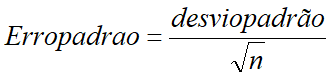

Lembrando!!!!!!!!!!!!!!!!!!

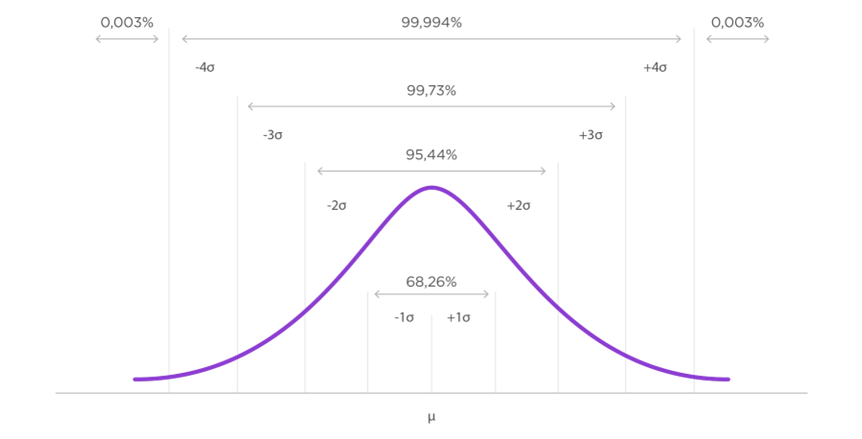

p=0.10  0.90
p=0.20  0.80
0.30    0.70
...
0.60    0.40

p*(1-p)

### Cálculo do Intervalo de Confiança de 95% para proporção

#### Limite inferior = p - 1.96*sqrt(p*q)
#### Limite superior = p + 1.96*sqrt(p*q)

#### nível de confiança de 95% = 1.96
#### p=proporção de usuários de telefone móvel
#### q= 1-p = proporção de usuários sem telefone móvel

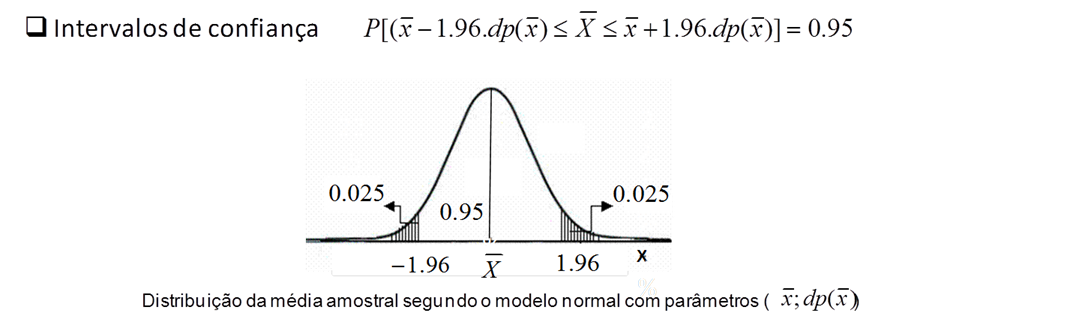

### Cálculo da proporção de clientes com telefone

### Alterar o número de clientes com telefone móvel (k)
### prop_tel=k/40


In [51]:
telefone_ams =pd.pivot_table(df_sample, index='Telefone_movel', values='ID', aggfunc=np.count_nonzero)
telefone_ams['%'] = (pd.pivot_table(df_sample, index='Telefone_movel', values='ID', aggfunc=np.count_nonzero))/df_sample['ID'].count()*100
telefone_ams

,ID,%
Telefone_movel,,
2,35,87.5
4,5,12.5


In [103]:
# p=proporção de usuários de telefone móvel
# q= 1-p = proporção de usuários sem telefone móvel
# nível de confiança de 95% = 1.96

# Erro padrão da proporção
p=0.875
erro_padrao= p*(1-p)/np.sqrt(len(df_sample))
erro_padrao

0.017293705954045824

In [105]:
import math as math

# Cálculo do Erro padrão

# 1 passo: criar a variável dummy se tem telefone móvel
df_sample.loc[(df_sample.Telefone_movel == "2"), 'amostra_clientes_com_telefone']=1

# 2 passo: somar as pessoas com telefone móvel
amostra_clientes_com_telefone = df_sample['amostra_clientes_com_telefone'].sum()

print('total com telefone {}'.format(amostra_clientes_com_telefone))

# 3 passo: tamanho da amostra
tamanho_amostra = len(df_sample)

print('tamanho da amostra {}'.format(tamanho_amostra))

# 4 passo: calcular a proporcao de clientes com telefone
prop_telefone = amostra_clientes_com_telefone/tamanho_amostra
prop_telefone
print('prop_telefone {}'.format(prop_telefone))
# 5 passo: calcular o erro padrão
erro_padrao = math.pow((prop_telefone*(1-prop_telefone)/tamanho_amostra), 1/2)

print('erro_padrao {}'.format(erro_padrao))

total com telefone 35.0
tamanho da amostra 40
prop_telefone 0.875
erro_padrao 0.05229125165837972


In [107]:
#Limite inferior do intercalo de confiança
Limite_inferior = p - 1.96*erro_padrao
Limite_inferior

0.7725091467495757

In [109]:
#Limite superior do intervalo de confiança

Limite_superior = p + 1.96*erro_padrao
Limite_superior

0.9774908532504243

In [111]:
# Intervalo de Confiança da variável penetração de celular na população 
print (' IC da Celular', '\n Penetração=:', p,'\n Limite Inferior:', Limite_inferior  ,'\n Limite Superior:', Limite_superior)

 IC da Celular 
 Penetração=: 0.875 
 Limite Inferior: 0.7725091467495757 
 Limite Superior: 0.9774908532504243


### E se tivessemos usado uma amostra para estimar uma média, por exemplo idade média dos clientes

In [81]:
#Cálculo do IC da média da variável idade
IdadeMédia=np.mean(df_sample['idade'])
IdadeMédia

39.55

In [83]:
from scipy.stats import norm
alfa=0.05
n=40
z=norm.ppf(1-alfa/2,0,1)
z


1.959963984540054

In [85]:
IdadeStd= np.std(df_sample['idade'])/(n**0.5)
IdadeStd

2.1318859022002092

In [87]:
Xinf=IdadeMédia - z*IdadeStd
Xinf

35.371580412538904

In [89]:
Xsup=IdadeMédia + z*IdadeStd
Xsup

43.72841958746109

In [91]:
# Intervalo de Confiança da variável média de idade 
print (' IC da Idade', '\n Idade média=:', IdadeMédia,'\n Limite Inferior:', Xinf  ,'\n Limite Superior:', Xsup)



 IC da Idade 
 Idade média=: 39.55 
 Limite Inferior: 35.371580412538904 
 Limite Superior: 43.72841958746109
